#Project Topic
**Fish weight prediction**

Objective:  The primary goal of this project is to build a machine learning model. predict the weight of a fish based on its physical measurements (like length, height, and width) and species.


In [ ]:
#import requried all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Libraries Used**

**Pandas** :-Think of Pandas as a super-powered spreadsheet tool for Python. We use it to load our data from a file (like a CSV) into a structured table called a DataFrame

**NumPy**:- This is the fundamental package for scientific computing in Python. We use it for any heavy-duty numerical operations,working with arrays of data

**Matplotlib & Seaborn** :- These are visualization libraries. They are our "paintbrushes" for creating charts and plots. Matplotlib provides the basic plotting framework, while Seaborn builds on top of it to make creating beautiful and informative statistical plots (like scatter plots and heatmaps) much simpler.

**sklearn** :- This is the most important library for our project. It's a comprehensive toolkit for machine learning. We use it for:

train_test_split: The function that automatically splits our data into training and testing sets.

LinearRegression: The actual machine learning model algorithm we use.

metrics: A module within sklearn that provides tools to calculate our evaluation scores

In [ ]:
# Set some display options for better viewing
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

**1**:- Data gathering & exploration: We start with a dataset containing various fish species and their measurements. The first step is to simply look at the data to understand it. Will check for things like:

>What are the columns (features)? (e.g., Species, Length, Height, Width)

>relationships between different measurements


In [ ]:
#load and explore the data
url = 'https://raw.githubusercontent.com/ybifoundation/Dataset/main/Fish.csv'
df = pd.read_csv(url)
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


In [ ]:
print("first five rows")
print(df.head())

first five rows
   Category Species  Weight   Height   Width  Length1  Length2  Length3
0         1   Bream   242.0  11.5200  4.0200     23.2     25.4     30.0
1         1   Bream   290.0  12.4800  4.3056     24.0     26.3     31.2
2         1   Bream   340.0  12.3778  4.6961     23.9     26.5     31.1
3         1   Bream   363.0  12.7300  4.4555     26.3     29.0     33.5
4         1   Bream   430.0  12.4440  5.1340     26.5     29.0     34.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB
None


In [ ]:
print("checking missing value ")
print(df.isnull().sum())

checking missing value 
Category    0
Species     0
Weight      0
Height      0
Width       0
Length1     0
Length2     0
Length3     0
dtype: int64


visulaizing the relationship betn length and weight


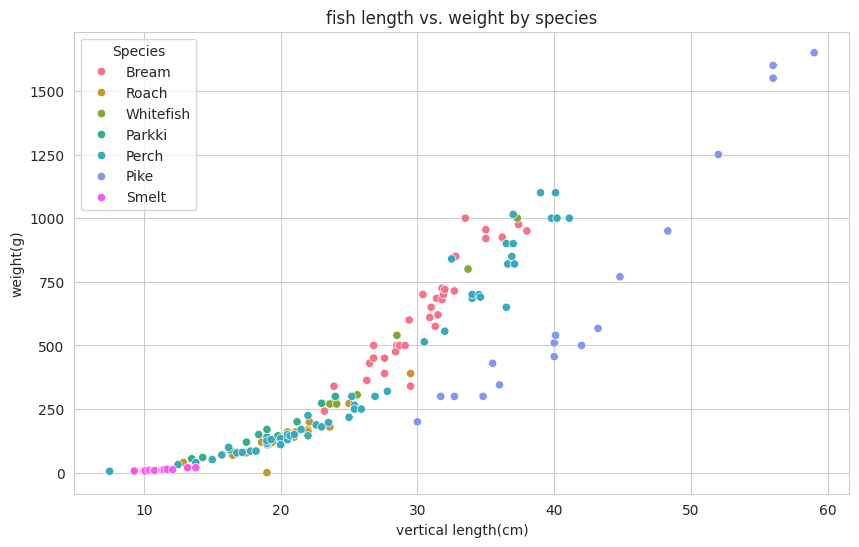

visulizing the correlation between all numerical feature


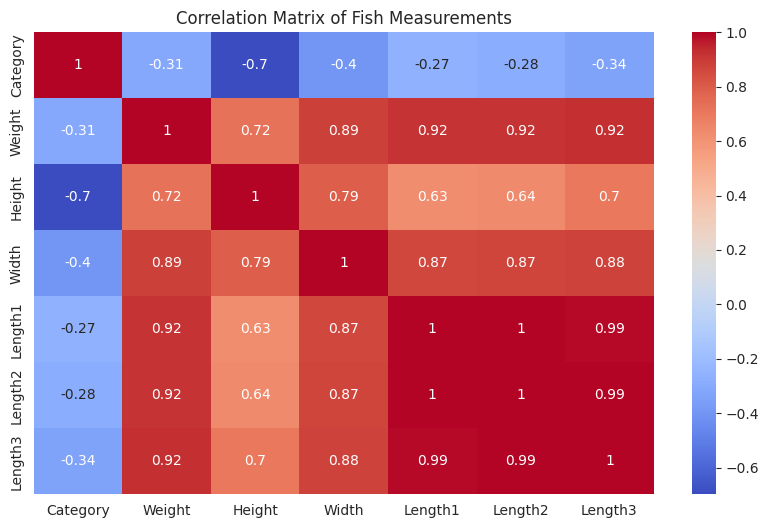

In [ ]:
# Exploratory data analysis(EDA) - visualizing relationship

print("visulaizing the relationship betn length and weight")
plt.figure(figsize=(10,6))
sns.scatterplot(x='Length1', y='Weight',data=df,hue='Species')
plt.title('fish length vs. weight by species')
plt.xlabel('vertical length(cm)')
plt.ylabel('weight(g)')
plt.show()

print("visulizing the correlation between all numerical feature")
#  we only want to correlate numerical columns
numerical_df = df.drop('Species', axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Fish Measurements')
plt.show()


**Data Preprocessing & Feature Selection** :- This is the "cleanup" phase. Our model needs clean, numerical data to work with.

>Handling categorical data:The 'Species' column is text (e.g., 'Bream', 'Pike'). A machine can't understand text directly, so we convert these species names into numbers using a technique called One-Hot Encoding.

>Defining features and target: We separate our data into two parts:

>>Features (X): The inputs to our model—the measurements we use to make a prediction (length, height, width, species).

>>Target (y): The value we want to predict—the 'weight' of the fish.



In [ ]:
# Data preprocessing
# the 'species columns is categorical , we need to convert it to numbers.
# we will use one-hot encoding for this

dummies = pd.get_dummies(df['Species'], drop_first=True)
df =pd.concat([df,dummies],axis=1)
df.drop('Species',axis=1, inplace=True)

print("\n dataset one-hot encoding 'species' ")
print(df.head())


 dataset one-hot encoding 'species' 
   Category  Weight   Height   Width  Length1  Length2  Length3  Parkki  \
0         1   242.0  11.5200  4.0200     23.2     25.4     30.0   False   
1         1   290.0  12.4800  4.3056     24.0     26.3     31.2   False   
2         1   340.0  12.3778  4.6961     23.9     26.5     31.1   False   
3         1   363.0  12.7300  4.4555     26.3     29.0     33.5   False   
4         1   430.0  12.4440  5.1340     26.5     29.0     34.0   False   

   Perch   Pike  Roach  Smelt  Whitefish  
0  False  False  False  False      False  
1  False  False  False  False      False  
2  False  False  False  False      False  
3  False  False  False  False      False  
4  False  False  False  False      False  


In [ ]:
#  Define feature (x) and Target(y)

# x contain all columns ecxept 'Weight'
X=df.drop('Weight',axis=1)

# Y is for 'Weight'
Y=df['Weight']


print("Features (X) shape:", X.shape)
print("Target (y) shape:", Y.shape)

Features (X) shape: (159, 12)
Target (y) shape: (159,)


**Splitting the Data**: we can't test our model on the same data it learned from; that would be like giving a student the answers to a test before they take it! So, we split our dataset into two parts:

>Training Set (80%): The model learns the relationships from this data.

>Testing Set (20%): we keep this data separate to evaluate how well our trained model performs on new, unseen examples.

In [ ]:
# split data into Training and Testing Sets

# We split the data: 80% for training the model, 20% for testing it.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))



Training set size: 127
Testing set size: 32


**Model Building & Training**: This is where the magic happens! We choose a Multiple Linear Regression model. This model learns to find the best straight-line relationship between all our input features (lengths, species, etc.) and the target (weight). It calculates a formula like:

Weight=(c
1
​
 ×Length)+(c
2
​
 ×Height)+...+intercept

In [ ]:
#  create and train the linear regression model

model= LinearRegression()

# train the model using training data
model.fit(X_train,Y_train)

print("Model training complete")
print("\nModel Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)


Model training complete

Model Intercept: -841.7533495683936
Model Coefficients: [  14.93520041  -10.73045193    7.22621264  -59.1395506    55.61529428
   39.05378679  124.62722535   44.80039908 -376.18108557  -24.7459662
  256.01047331  -41.96967802]


**Evaluation**: After training, we use the testing set to see how good our model's predictions are. We measure its performance using a few key metrics:
>**Mean Absolute Error (MAE)** :- The average absolute difference between the predicted weights and the actual weights

>R-squared (R
2
 ): This tells us what percentage of the variation in the fish's weight can be explained by our model's features

In [ ]:
# make prediction and evalution the model

Y_pred = model.predict(X_test)
print("Evaluating model performance...")

# calculate evalution metrics

mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse= metrics.mean_squared_error(Y_test,Y_pred)
r2 =metrics.r2_score(Y_test,Y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Evaluating model performance...
Mean Absolute Error (MAE): 65.30
Mean Squared Error (MSE): 7007.38
R-squared (R2 Score): 0.95


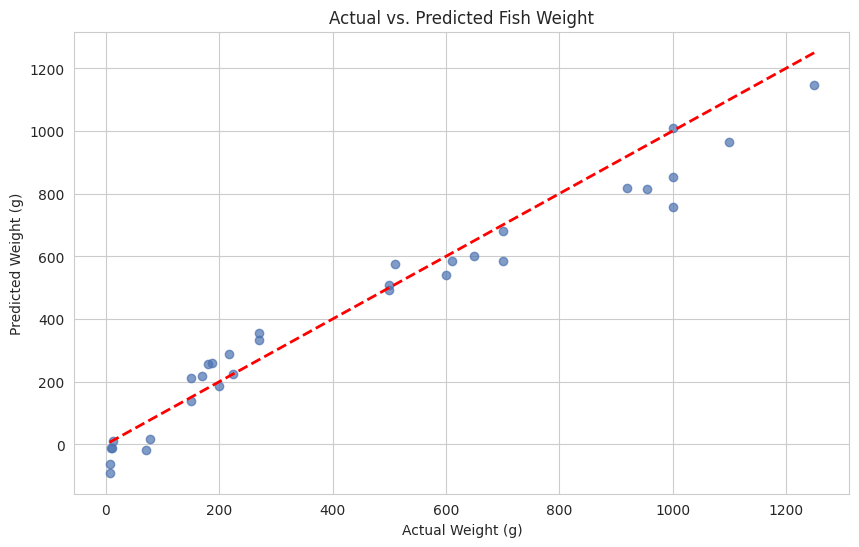

In [ ]:
# Visualize the Results

# A good way to see our results is to plot the actual values vs. the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2) # Perfect prediction line
plt.xlabel('Actual Weight (g)')
plt.ylabel('Predicted Weight (g)')
plt.title('Actual vs. Predicted Fish Weight')
plt.show()
